# Iris DataSet Model Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


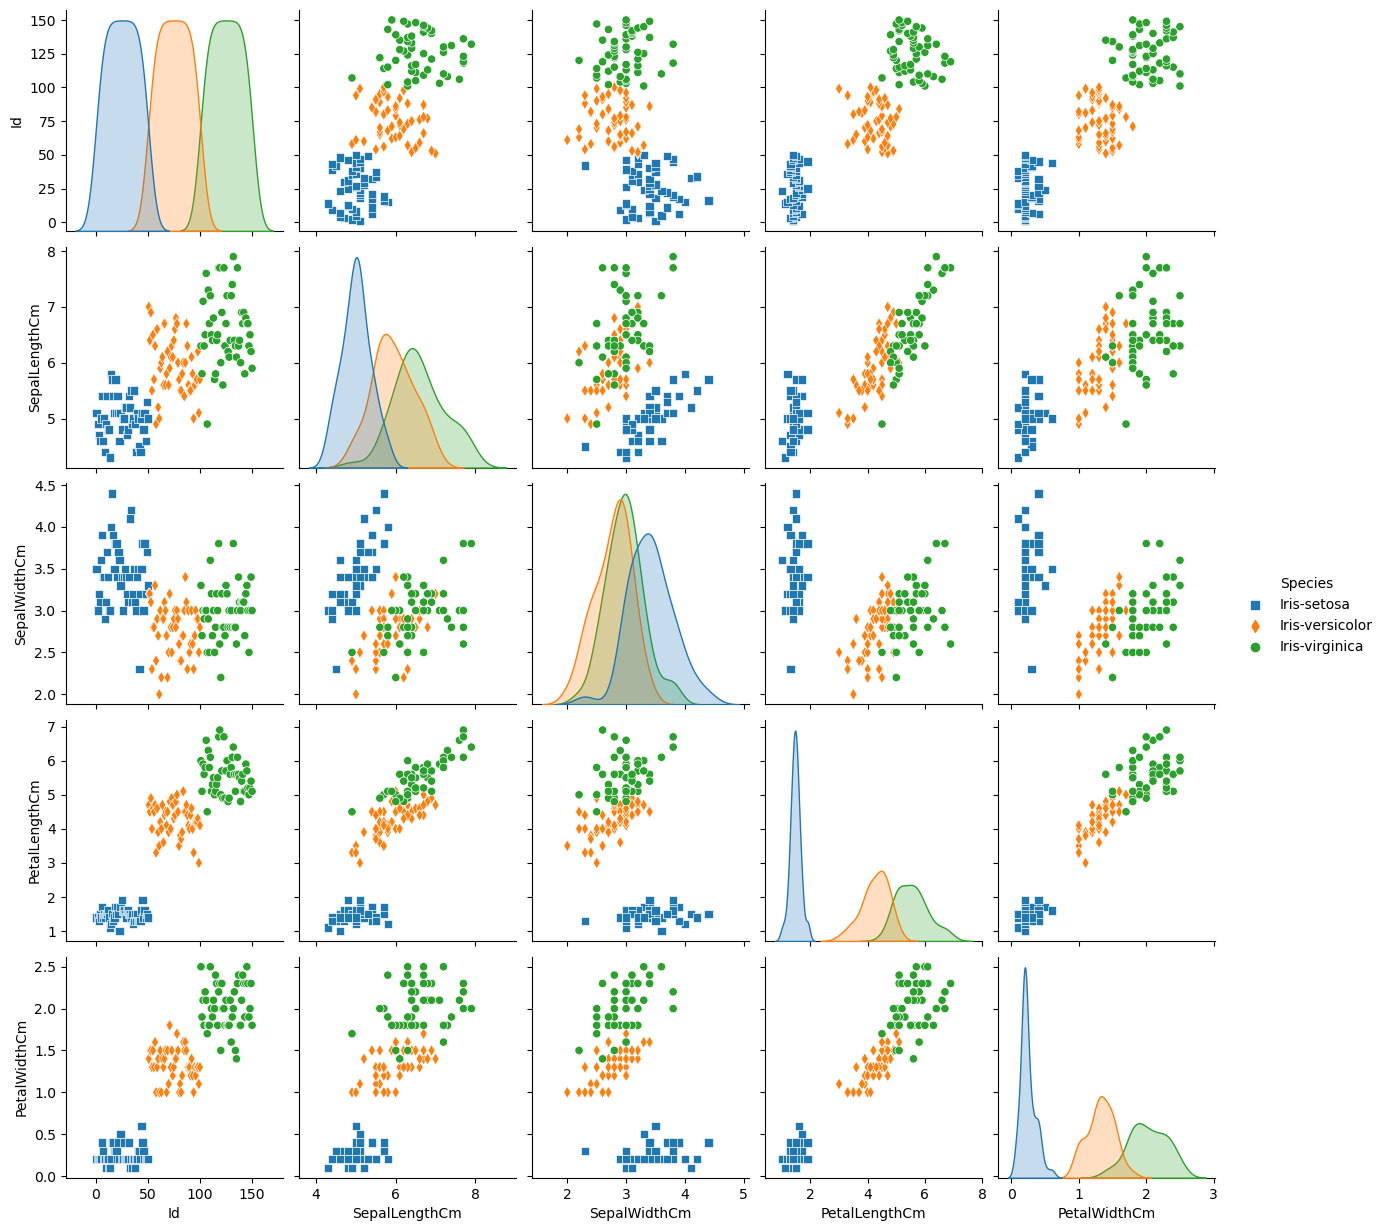

In [6]:
sns.pairplot(data=df, hue='Species' , height=2.5, markers=['s', 'd', 'o'])
plt.show()

## Dividing columns between inputs and targets

In [7]:
X = df.drop(['Species'], axis = 1)
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [8]:
Y = df.Species

## Scaling Numeric Features

In [9]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

## Training and Test Sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test= train_test_split(X,Y, random_state=1, test_size=0.2, stratify=Y)

## Training a Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression(solver='liblinear')
Model.fit(X_train, Y_train)
Model

LogisticRegression(solver='liblinear')

## Making Predictions and Evaluating the Model

In [12]:
Y_pred = Model.predict(X_test)

In [13]:
N_df = pd.DataFrame({
    'Y_pred': Y_pred,
    'Y_test': Y_test
    }, index=None)

In [14]:
N_df.head()

,Y_pred,Y_test
107,Iris-virginica,Iris-virginica
9,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
11,Iris-setosa,Iris-setosa
43,Iris-setosa,Iris-setosa


In [15]:
N_df.Y_pred.value_counts()

Iris-versicolor    11
Iris-setosa        10
Iris-virginica      9
Name: Y_pred, dtype: int64

In [16]:
N_df.Y_test.value_counts()

Iris-virginica     10
Iris-setosa        10
Iris-versicolor    10
Name: Y_test, dtype: int64

In [17]:
Model.score(X_test, Y_test)

0.9666666666666667